# Linear Regression

## Overview
A supervised learning algorithm to predict a continuous numeric value by modeling the linear relationship between one or more input features and an output variable.

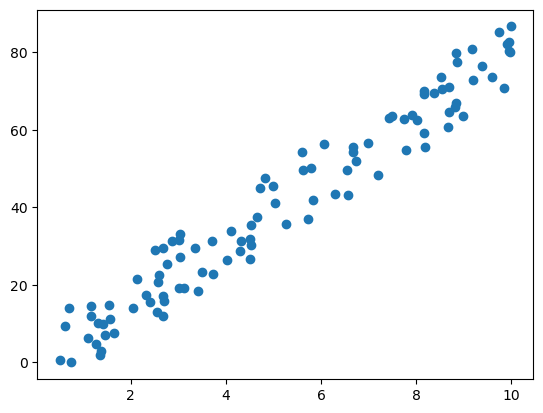

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

df = pd.read_csv('scores.csv')
df = df.rename(columns={'study_time': 'x', 'score': 'y'}) # just to make it generic
plt.scatter(df.x, df.y)
plt.show()

## Cost Function
A function that measures how wrong the model’s predictions are by calculating the error between predicted values and actual values.
The goal of training is to minimize this cost.

### Mean Squared Error
The most common cost function used, denoted as:

$$
J(\theta) = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
where n is the size of the dataset.
</div>


$$
\hat{y}_i = mx_i+b
$$


<div style="text-align: center; font-style: italic; font-size: 90%;">
and the parameter vector is
</div>

$$
\theta =
\begin{bmatrix}
b \\
m
\end{bmatrix}
$$




### Code implementation

In [119]:
def mean_squared_error(m, b, points):
    total_error = 0
    n = len(points)
    for i in range(n):
        y = points.iloc[i].y
        x = points.iloc[i].x

        total_error += (y - (m * x + b)) ** 2

    return (1/n) * total_error

In [120]:
m = 0
b = 0
mean_squared_error(m,b,df)

np.float64(2292.3048000000003)

## Gradient Descent
An iterative optimization algorithm used to minimize a loss function in machine learning by updating model parameters (weights and biases) in the direction of the steepest descent. We want to adjust m and b to make J(m, b) as small as possible:

<div style="text-align: center; font-style: italic; font-size: 90%;">
Partial derivative with respect to m
</div>

$$
\frac{\partial J(\theta)}{\partial m} = \frac{1}{n} \sum_{i=1}^n2(y_i - \hat{y}_i)(-x_i)
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
or to simplify
</div>

$$
\frac{\partial J(\theta)}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n}x_i(y_i - \hat{y}_i)
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
Partial derivative with respect to b
</div>

$$
\frac{\partial J(\theta)}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n}(y_i - (\hat{y}_i)
$$

### Code Implementation

In [121]:
def gradient_descent(m, b, points, alpha):
    n = len(points)
    partial_m = 0
    partial_b = 0

    for i in range(n):
        x = points.iloc[i].x
        y = points.iloc[i].y
        
        partial_m += -(2/n) * x * (y - (m * x + b))
        partial_b += -(2/n) * (y - (m * x + b))

    m = m - alpha * partial_m
    b = b - alpha * partial_b

    return m, b

In [122]:
epochs = 2000
alpha = 0.001

for epoch in range(epochs):
    m, b = gradient_descent(m, b, df, alpha)

print(m,b)

mean_squared_error(m, b, df)

7.99624912329026 -0.30983835515366764


np.float64(30.4295623755913)

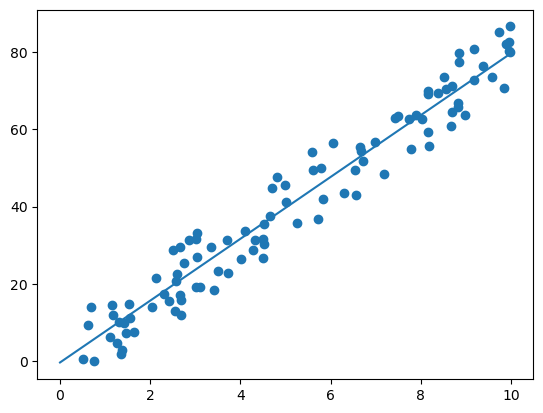

In [123]:
plt.scatter(df.x, df.y)
plt.plot(list(range(0, 11)), [m * x + b for x in range(0, 11)])
plt.show()

## Comparison with Scikit-Learn

DIY Gradient Descent:
m = 7.99624912329026
b = -0.30983835515366764
MSE = 30.4295623755913

Scikit-Learn LinearRegression:
m = 8.132712614491972
b = -1.2398972156538903
MSE = 30.22186842047816
DIY Prediction: 79.65265287774893
Sklearn Prediction: [80.08722893]


/home/zeno/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


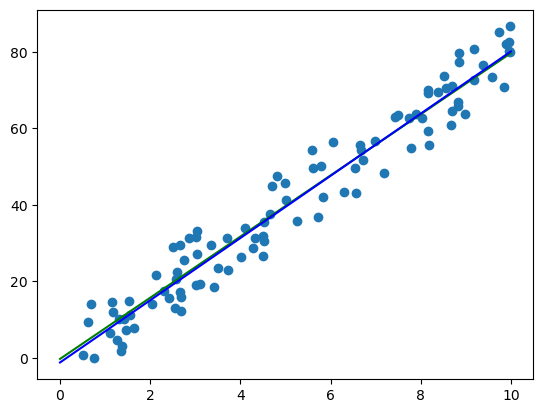

In [130]:
model = LinearRegression()

X = df[['x']]  
y = df['y']

model.fit(X, y)

m_sklearn = model.coef_[0]    
b_sklearn = model.intercept_  

print("DIY Gradient Descent:")
print("m =", m)
print("b =", b)
print("MSE =", mean_squared_error(m, b, df))

print("\nScikit-Learn LinearRegression:")
print("m =", m_sklearn)
print("b =", b_sklearn)
print("MSE =", mse_sklearn)

def predict(x, m, b):
    return m * x + b

diy_pred = predict(10, m, b)
sklearn_pred = model.predict(np.array([[10]]))
print("DIY Prediction:", diy_pred)
print('Sklearn Prediction:', sklearn_pred)
plt.scatter(df.x, df.y)
plt.plot(list(range(0, 11)), [m * x + b for x in range(0, 11)], color='green', label='DIY')
plt.plot(list(range(0, 11)), [m_sklearn * x + b_sklearn for x in range(0, 11)], color='blue', label='Sklearn')
plt.show()

## Closed-Form Solution
A closed-form solution is when you can compute the exact answer directly using a formula,
without iterations, guessing, or looping. We already have the intuition that the cost function is:

$$
RSS = \sum_{i=1}^{n}(y_i-\hat{y}_i)^2
$$

This is pretty much the same as the Mean Squared Error. RSS means Residual Sum of Squares. The point of the Closed-Form solution is to get the best fit line without loops by finding the partial derivative of matrix operations. This is helpful mostly when the dataset has more than 2 dimensions.

<div style="text-align: center; font-style: italic; font-size: 90%;">
These are the X values/dimensions
</div>

$$
X =
\begin{bmatrix}
1 \\
x_1 \\ 
x_2 \\
. \\
. \\ 
. \\
x_n 
\end{bmatrix}
$$


<div style="text-align: center; font-style: italic; font-size: 90%;">
Parameters where m is the slope and b is the intercept: 
</div>

$$
\beta =
\begin{bmatrix}
b \\
m_1 \\ 
m_2 \\
. \\
. \\ 
. \\
m_n 
\end{bmatrix}
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
Therefore we can write our equation like this:
</div>

$$
\hat{y}_i=X_i\beta
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
Since we have our slope intercept equation into matrix form, we can now form our RSS equation into:
</div>


$$
RSS(\beta)=(y-X\beta)^T(y-X\beta)
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
Just like in our MSE equation, we must square it to prevent negative and positive values from cancelling each other. However, since these are matrices, we multiply itself with its transpose.
</div>


<div style="text-align: center; font-style: italic; font-size: 90%;">
Simplify using FOIL method:
</div>

$$
=y^Ty-\beta Xy^T-\beta^TX^Ty+\beta^TX^TX\beta
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
Since $$\beta Xy^T-\beta^TX^Ty$$ are scalars, we can write this as:
</div>

$$
=y^Ty-2\beta^TX^Ty+\beta^TX^TX\beta
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
This is where we get the lowest possible derivative of the steep by getting the partial derivative of the RSS function with respect to the parameters and setting it to zero. After that, we can simplify this equation further using basic algebraic rules:
</div>

$$
\frac{\partial{RSS}}{\partial\beta} = 0-2X^Ty+2X^TX\hat{\beta}=0
$$

$$
\frac{\partial{RSS}}{\partial\beta} = X^Ty+X^TX\hat{\beta}=0
$$

<div style="text-align: center; font-style: italic; font-size: 90%;">
Isolate $$\hat{\beta}$$ by multiplying $$X^TX$$ to its inverse $$(X^TX)^{-1}$$
</div>

<div style="text-align: center; font-style: italic; font-size: 90%;">
Now we have:
</div>

$$
\hat{\beta}=(X^TX)^{-1}X^Ty
$$

### Code Implementation

In [ ]:
def closed_form_solution(X, y):
    